In [201]:
# Run Imports
import pandas as pd
import pandas.plotting
import numpy as np
import matplotlib.pyplot as plt
import os
import requests
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [202]:
# Load .env enviroment variables
load_dotenv()

True

In [203]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [204]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [250]:
# Set the Tesla and Coca-Cola tickers
ticker = ["LUV","DAL"]
# Set timeframe to '1D'
timeframe = "1D"
# Set start and end datetimes of 1 year, between now and 365 days ago.
start_date = pd.Timestamp("2014-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2028-05-01", tz="America/New_York").isoformat()
# Get 1 year's worth of historical data for Tesla and Coca-Cola
df_ticker = alpaca.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df
# Display sample data
df_ticker.head()

DAL                                    LUV  \
                            open   high      low  close   volume   open   
time                                                                      
2017-06-15 00:00:00-04:00  51.70  51.84  50.9150  51.57  5820200  59.21   
2017-06-16 00:00:00-04:00  51.55  52.00  51.2503  52.00  4288586  60.01   
2017-06-19 00:00:00-04:00  52.10  52.63  51.9400  52.52  4838024  60.64   
2017-06-20 00:00:00-04:00  52.68  52.80  51.6600  51.79  5872184  60.85   
2017-06-21 00:00:00-04:00  51.99  52.58  51.7500  52.28  4500929  60.42   

                                                            
                              high     low  close   volume  
time                                                        
2017-06-15 00:00:00-04:00  60.2100  58.990  60.13  4387639  
2017-06-16 00:00:00-04:00  60.5700  60.000  60.30  3537586  
2017-06-19 00:00:00-04:00  61.0900  60.405  60.93  3399378  
2017-06-20 00:00:00-04:00  61.0700  60.235  60.32  3134246  
2017-06-21 00:00:00-04:00  61.3699  60.420  61.05  3366477

### Monte Carlo Simulation

In [206]:
# Format current date as ISO format
today = pd.Timestamp("2021-03-17", tz="America/New_York").isoformat()

In [248]:
# Set the tickers
tickers = ["LUV","DAL"]
# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

In [251]:
# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset( tickers, timeframe, start="2011-06-05", end=today, limit=1000).df
# Preview DataFrame
df_portfolio.head()

DAL                                    LUV  \
                            open     high    low  close   volume   open   
time                                                                      
2017-03-28 00:00:00-04:00  46.10  46.7953  44.48  46.53  6704525  52.80   
2017-03-29 00:00:00-04:00  46.42  46.6500  45.73  45.94  5575916  54.01   
2017-03-30 00:00:00-04:00  46.02  46.4800  45.91  46.27  4329022  53.52   
2017-03-31 00:00:00-04:00  46.12  46.2900  45.89  45.95  4514900  53.53   
2017-04-03 00:00:00-04:00  46.00  46.3400  45.57  46.31  6377687  53.79   

                                                           
                            high    low    close   volume  
time                                                       
2017-03-28 00:00:00-04:00  54.54  52.46  54.2000  5744844  
2017-03-29 00:00:00-04:00  54.08  53.16  53.4744  3961596  
2017-03-30 00:00:00-04:00  54.25  53.41  53.8400  2282278  
2017-03-31 00:00:00-04:00  53.96  53.41  53.7550  2473136  
2017-04-03 00:00:00-04:00  54.12  53.18  53.9900  2888043

In [236]:
MC_dist = MCSimulation(portfolio_data =df_portfolio, weights = [1/3,1/3,1/3], num_simulation = 500, num_trading_days = 252*30)

### Linear Regression Model

In [237]:
from pylab import mpl, plt
plt.style.use('seaborn')

In [238]:
#Defines the ticker symbols and dates to pull data for
symbols = ['LUV']
start = '2001-01-01'
end = '2021-06-03'

In [239]:
ccl_symbols = ['CLL']
ccl_start = '2001-01-01'
ccl_end = '2021-06-03'

In [240]:
#create the DF and pull in only the Adjusted Close for specified ticker
luv_df = pd.DataFrame()
for s in symbols:
    luv_df[s] = yf.download(s,start,end)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [241]:
#create the DF and pull in only the Adjusted Close for specified ticker
ccl_df = pd.DataFrame()
for s in ccl_symbols:
    ccl_df[s] = yf.download(s,ccl_start,ccl_end)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [242]:
#Column does not have a name, so name it
luv_df.rename(columns={ luv_df.columns[0] : 'Adj Close'}, inplace=True)

In [243]:
#Column does not have a name, so name it
ccl_df.rename(columns={ ccl_df.columns[0] : 'Adj Close'}, inplace=True)

In [244]:
# Set the timeframe for the Simple Moving Averages (42 days and 252 days)
SMA1 = 42  
SMA2 = 252

In [253]:
# Create SMA columns and perform the calculations
df_ticker['SMA1'] = df_ticker['DAL']['close'].rolling(SMA1).mean()
df_ticker['SMA2'] = df_ticker['DAL']['close'].rolling(SMA2).mean()

#drop nas
#df_portfolio.dropna(inplace = True)

In [256]:
df_ticker.dropna(inplace = True)
df_ticker.sample(10)

DAL                                       LUV  \
                            open     high      low  close    volume   open   
time                                                                         
2019-03-22 00:00:00-04:00  50.04  50.2400  49.5165  49.76   5256299  50.42   
2019-07-23 00:00:00-04:00  61.45  63.1100  61.2700  63.10   6228023  52.75   
2019-10-01 00:00:00-04:00  58.05  58.6800  56.6500  57.02   6110474  54.29   
2020-06-29 00:00:00-04:00  27.20  28.8200  26.5800  28.60  37129582  33.15   
2020-01-16 00:00:00-05:00  62.06  62.4800  61.6300  61.88   4163557  55.38   
2019-07-05 00:00:00-04:00  59.15  59.3900  57.8500  58.69   4463820  51.85   
2020-04-13 00:00:00-04:00  24.98  25.0600  22.0800  23.25  71545087  36.72   
2019-09-10 00:00:00-04:00  58.08  58.7227  57.8000  58.64   3792620  53.29   
2021-05-20 00:00:00-04:00  46.32  46.3700  44.9100  45.41  11591993  60.65   
2020-03-19 00:00:00-04:00  23.36  24.1500  20.0000  21.50  42710188  34.65   

                                                                 SMA1  \
                             high     low  close    volume              
time                                                                    
2019-03-22 00:00:00-04:00  50.515  49.300  49.32   4324288  50.111631   
2019-07-23 00:00:00-04:00  54.250  52.730  54.13   2978810  57.126352   
2019-10-01 00:00:00-04:00  54.900  53.290  53.37   3819782  58.214762   
2020-06-29 00:00:00-04:00  35.360  32.330  35.04  24726256  26.318624   
2020-01-16 00:00:00-05:00  55.680  55.075  55.31   2118427  57.829050   
2019-07-05 00:00:00-04:00  52.250  51.460  51.88   1745287  55.475879   
2020-04-13 00:00:00-04:00  36.720  33.750  34.26  17206012  38.417738   
2019-09-10 00:00:00-04:00  53.630  52.880  53.41   2828994  59.437262   
2021-05-20 00:00:00-04:00  60.920  59.290  59.93   7164183  46.769629   
2020-03-19 00:00:00-04:00  35.050  30.500  30.85  33818030  50.886310   

                                SMA2  
                                      
time                                  
2019-03-22 00:00:00-04:00  53.223724  
2019-07-23 00:00:00-04:00  54.422620  
2019-10-01 00:00:00-04:00  54.896985  
2020-06-29 00:00:00-04:00  47.726861  
2020-01-16 00:00:00-05:00  55.804581  
2019-07-05 00:00:00-04:00  53.931569  
2020-04-13 00:00:00-04:00  54.198238  
2019-09-10 00:00:00-04:00  54.853374  
2021-05-20 00:00:00-04:00  36.952542  
2020-03-19 00:00:00-04:00  56.007980

In [160]:
# Create SMA columns and perform the calculations
#ccl_df['SMA1'] = ccl_df['Adj Close'].rolling(SMA1).mean()  
#ccl_df['SMA2'] = ccl_df['Adj Close'].rolling(SMA2).mean()

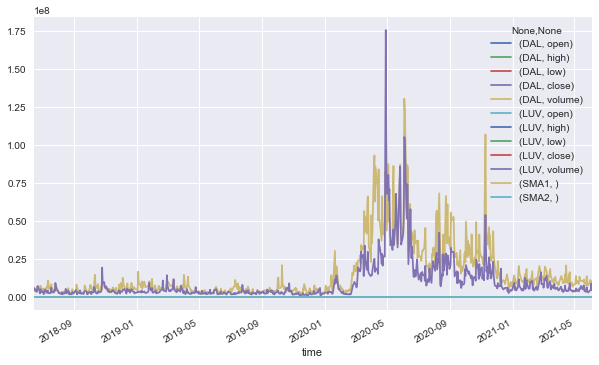

In [257]:
df_ticker.plot(y = sma_figsize=(10, 6))

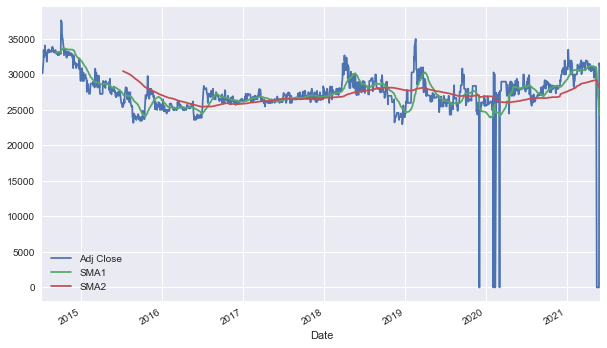

In [162]:
ccl_df.plot(figsize=(10, 6))

In [163]:
luv_df.dropna(inplace=True)

In [164]:
ccl_df.dropna(inplace=True)

In [165]:
# Check where the short term MA is greater than longe term MA, mark those with a 1 and others with -1
luv_df['Position'] = np.where(luv_df['SMA1'] > luv_df['SMA2'], 1, -1)

KeyError: 'SMA1'

In [ ]:
# Check where the short term MA is greater than longe term MA, mark those with a 1 and others with -1
ccl_df['Position'] = np.where(ccl_df['SMA1'] > ccl_df['SMA2'], 1, -1)

In [ ]:
luv_df.head()

In [ ]:
luv_df.reset_index()

In [ ]:
ccl_df.head()
ccl_df.rename(columns={'Adj Close': 'close'}, inplace=True)

In [ ]:
combined_df = pd.concat([ccl_df, luv_df], axis = 1)

In [ ]:
print (combined_df)